## Install modules to environment

In [1]:
%pip install pandas numpy requests importlib seaborn matplotlib

  Using cached importlib-1.0.4.zip (7.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      ERROR: Can not execute `setup.py` since setuptools is not available in the build environment.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.backtest import Backtest
from Backtesting.strategies.marketRegimeStrategy import MarketRegimeStrategy

from datetime import datetime


## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
LIMIT = 1000


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"

SYMBOL = "BTC-USD" # Can be any symbol available on Coinbase
INTERVAL = "1h" # Can be any interval such as "1d", "1h", "15m", etc.

In [5]:
bt_start_time = int(datetime(2021, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2023, 12, 31, 23, 59).timestamp() * 1000)

ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)  
ft_end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)


In [6]:
market_data_fetcher = CoinbaseFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)



### On Chain Metrics Data (TBU)

In [7]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ON_CHAIN_LIMIT = 20000 # Number of data points to fetch


netflow_window = "hour"
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

exchange_whale_ratio_window = "hour"
exchange_whale_ratio_endpoint_category = "flow-indicator"
exchange_whale_ratio_metric = "exchange-whale-ratio"

funding_rates_window = "hour"
funding_rates_endpoint_category = "market-data"
funding_rates_metric = "funding-rates"

dormancy_window = "day"
dormancy_endpoint_category = "network-indicator"
dormancy_metric = "dormancy"


In [8]:
def fetch_hmm_dataset(start_time, end_time, file_name):
  market_data_fetcher.fetch(start_time, end_time, INTERVAL)
  
  on_chain_fetcher_netflow = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
  on_chain_fetcher_netflow.fetch_netflow(netflow_window, start_time, end_time)

  on_chain_fetecher_exchange_whale_ratio = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, exchange_whale_ratio_endpoint_category, exchange_whale_ratio_metric, EXCHANGE, ON_CHAIN_LIMIT)
  on_chain_fetecher_exchange_whale_ratio.fetch_exchange_whale_ratio(exchange_whale_ratio_window, start_time, end_time)

  on_chain_fetcher_funding_rates = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, funding_rates_endpoint_category, funding_rates_metric, EXCHANGE, ON_CHAIN_LIMIT)
  on_chain_fetcher_funding_rates.fetch_funding_rates(funding_rates_window, start_time, end_time)

  on_chain_fetcher_without_exchange_dormancy = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, dormancy_endpoint_category, dormancy_metric, ON_CHAIN_LIMIT)
  on_chain_fetcher_without_exchange_dormancy.fetch_dormancy(dormancy_window, start_time, end_time)

  print("📁 Netflow path:", on_chain_fetcher_netflow.saved_filepath)
  print("📁 Whale Ratio path:", on_chain_fetecher_exchange_whale_ratio.saved_filepath)
  print("📁 Funding Rates path:", on_chain_fetcher_funding_rates.saved_filepath)
  print("📁 Dormancy path:", on_chain_fetcher_without_exchange_dormancy.saved_filepath)

  csvs_to_merge = [
    market_data_fetcher.saved_filepath,
    on_chain_fetcher_netflow.saved_filepath,
    on_chain_fetecher_exchange_whale_ratio.saved_filepath,
    on_chain_fetcher_funding_rates.saved_filepath,
    on_chain_fetcher_without_exchange_dormancy.saved_filepath 
  ]

  CryptoQuantFetcher.merge_selected_csv_files(csvs_to_merge, file_name)

In [9]:
hmm_backtest_file_path = "datasets/hmm_backtest_data.csv"
hmm_forwardtest_file_path = "datasets/hmm_forward_test_data.csv"

fetch_hmm_dataset(bt_start_time, bt_end_time, hmm_backtest_file_path)
fetch_hmm_dataset(ft_start_time, ft_end_time, hmm_forwardtest_file_path)


Fetching 1h data for BTC-USD from 2020-12-31 16:00:00 to 2023-12-31 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 996 candles. Total: 996
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieve

c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang-prelim-round\Backtesting\dataFetchers\onChainMetricsFetchers.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("1H").ffill()
c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang-prelim-round\Backtesting\dataFetchers\onChainMetricsFetchers.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_ts, end=end_ts, freq="1H")


✅ Merged CSV saved to: datasets/hmm_backtest_data.csv
Fetching 1h data for BTC-USD from 2023-12-31 16:00:00 to 2024-12-31 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1736438400000_to_1735660740000.csv with 35996 rows.
                         open      high       low     close      volume
timestamp                                                              
2025-01-09 11:00:00  93412.93  93815.20  93170.88  93407.52  124.649329
2025-01-09 12:00:00  93407.52  93645.83  93095.81  93371.22  238.832550
2025-01-09 13:00:00  93371.21  93451.98  91868.49  91943.29  815.065095
2025-01-09 14:00:00  91935.71  92857.98  91750.00  92817.98  648.71

c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang-prelim-round\Backtesting\dataFetchers\onChainMetricsFetchers.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("1H").ffill()
c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang-prelim-round\Backtesting\dataFetchers\onChainMetricsFetchers.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_ts, end=end_ts, freq="1H")


## Perform Backtesting

In [10]:
bt = Backtest(hmm_backtest_file_path, MarketRegimeStrategy(hmm_backtest_file_path, hmm_backtest_file_path, 0.5, 0.5), 100000, 30, 0.0006)

         1  -21588.80372320             +nan
         2  128695.94694231 +150284.75066552
         3  132871.62646506   +4175.67952275
         4  134980.84995031   +2109.22348525
         5  138176.13324885   +3195.28329854
         6  144082.53541980   +5906.40217096
         7  149623.27562725   +5540.74020745
         8  153177.06777300   +3553.79214575
         9  155406.18989609   +2229.12212310
        10  156290.57289893    +884.38300284
        11  156597.10321315    +306.53031422
        12  156712.55517300    +115.45195985
        13  156757.34964996     +44.79447697
        14  156772.93846327     +15.58881331
        15  156779.36686064      +6.42839737
        16  156782.39627711      +3.02941647
        17  156783.95987553      +1.56359842
        18  156784.81990805      +0.86003253
        19  156785.31344284      +0.49353479
        20  156785.60450031      +0.29105747
        21  156785.77913332      +0.17463301
        22  156785.88504470      +0.10591138
        23

Converged: True
Final log likelihood: 156786.03793893097
State Labels: {0: 'bullish', 2: 'bearish', 1: 'neutral'}
                timestamp      open     close  netflow_total  \
1     2021-01-01 01:00:00  29066.58  29487.95     268.894646   
2     2021-01-01 02:00:00  29490.29  29249.05     160.311902   
3     2021-01-01 03:00:00  29249.05  29358.30      63.804512   
4     2021-01-01 04:00:00  29358.30  29290.52      99.170215   
5     2021-01-01 05:00:00  29287.95  29240.79    -359.647558   
...                   ...       ...       ...            ...   
26242 2023-12-30 20:00:00  42345.91  42276.48     351.792404   
26243 2023-12-30 21:00:00  42276.49  42291.50     546.978911   
26244 2023-12-30 22:00:00  42291.24  42132.36     302.838117   
26245 2023-12-30 23:00:00  42132.40  42141.03    -329.273747   
26246 2023-12-31 00:00:00  42139.32  42348.37    -248.478552   

       exchange_whale_ratio  funding_rates  sa_average_dormancy  log_return  \
1                  0.450396       0.02

## Identify the best threshold from heatmap

bullish range:  [0.4  0.45 0.5  0.55 0.6  0.65 0.7 ]
bearish range:  [0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
Running with bullish=0.40, bearish=0.30
26247
{'Start Trade Date': '2021-01-01 00:00:00', 'End Trade Date': '2023-12-31 00:00:00', 'Final Portfolio Value': np.float64(49611.34895800085), 'Total Return (%)': np.float64(-50.38865104199915), 'Number of Trades': 1488, 'Win Rate (%)': 0.0, 'Max Drawdown (%)': np.float64(-2.33), 'Sharpe Ratio': np.float64(0.03)}
Result for bullish=0.40, bearish=0.30: 0.03
Running with bullish=0.40, bearish=0.35
26247
{'Start Trade Date': '2021-01-01 00:00:00', 'End Trade Date': '2023-12-31 00:00:00', 'Final Portfolio Value': np.float64(49611.34895800085), 'Total Return (%)': np.float64(-50.38865104199915), 'Number of Trades': 1488, 'Win Rate (%)': 0.0, 'Max Drawdown (%)': np.float64(-2.33), 'Sharpe Ratio': np.float64(0.03)}
Result for bullish=0.40, bearish=0.35: 0.03
Running with bullish=0.40, bearish=0.40
26247
{'Start Trade Date': '2021-01-01 00:00:00'

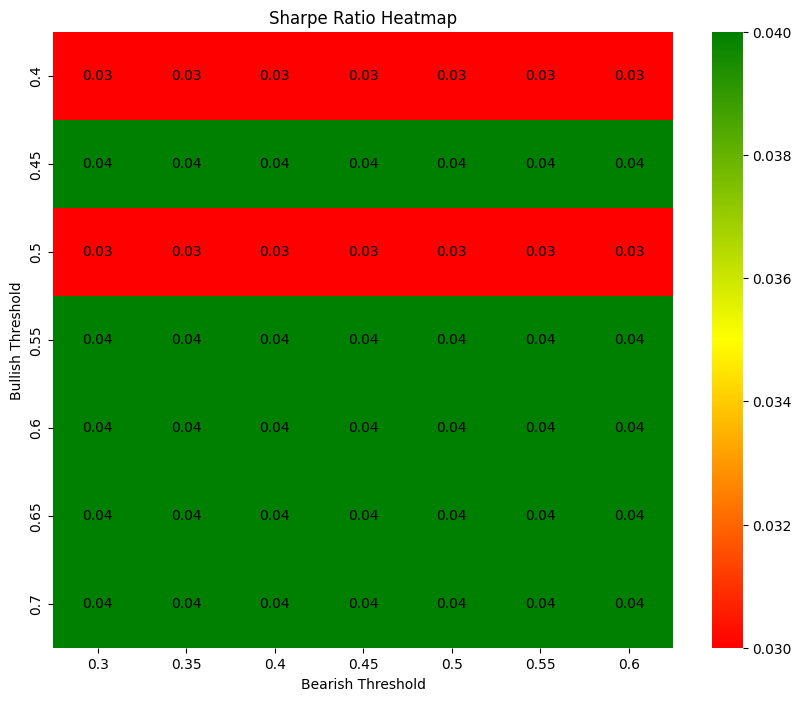

In [11]:
bt.run_backtest_heatmap(metric='Sharpe Ratio')


## Perform Forward Testing Using The Best Threshold

In [12]:
bt.set_data(hmm_forwardtest_file_path)
bt.set_thresholds(bull_thres=0.6, bear_thres=0.6)

In [13]:
bt.run()

9469


In [14]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2024-01-01 00:00:00
End Trade Date: 2024-12-31 00:00:00
Final Portfolio Value: 125255.80705400037
Total Return (%): 25.255807054000368
Number of Trades: 553
Win Rate (%): 0.0
Max Drawdown (%): -0.4
Sharpe Ratio: 0.27


In [15]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
